### Data Science course. Write a Data Science blog

PROJECT 

1. In which US states do you earn the most as a full-time developer?

2. What is the level education  in the  top countries?

3. What is the OpSys most used in the  top countries?





###  First step clone the repository

### !git clone https://github.com/olgaferro/stack-overflow-developer-survey-2021.git


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from currency_converter import CurrencyConverter
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import HTML


import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')

schema=pd.read_csv('./survey_results_schema.csv')

c = CurrencyConverter()

df.head()
#df.hist()


### 1. Data undersdanting


The following analysis is about a 2021 Stackoverflow survey. The survey contains questions about income, employment, education level, age coding, gender, ethnicity, country, etc.
With this information we are try to answer the next questions.


1. In which US states do you earn the most as a full-time developer?

2. What is the level education  in the  top countries?

3. What is the OpSys most used in the  top countries?


### 2. Data PREPARING


Firstly we are going to prepare the data with the information we need.


#Data understanding
#Data Preparation
#Modeling
#Evaluation
#Deployment

In [99]:
# 2.1 We are going take a look in the inicial dataframe

num_rows =df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset


print('The inicial dataframe  has rows:%d  and columns: %d'  % (num_rows, num_cols))



The inicial dataframe  has rows:83439  and columns: 48


In [100]:
# 2.1.1 A look inside the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [2]:
# 2.2. Select the important columns for our research

selected_columns = ['ResponseId','MainBranch','Employment','Country','Currency','US_State','EdLevel','Gender','Age','YearsCode','CompTotal','OpSys','DevType']

df_selected_cols = df[selected_columns].copy()

In [114]:
# 2.3 We are going to focus in Respondents who are - Developers- and - Work full-time-

# Select Developers
df_dev = df_selected_cols[df_selected_cols.MainBranch=='I am a developer by profession']

# Select Employed full time
df_dev_full_time = df_dev[df_selected_cols.Employment=='Employed full-time']

# Select US
df_dev_full_time_us = df_dev_full_time[df_selected_cols.Country=='United States of America']

# Currency dolar
df_dev_full_time_us=df_dev_full_time_us[df_dev_full_time_us['Currency'].str.contains("USD")]


# Fill with the mode  for dataframe US
df_dev_full_time_us['CompTotal'] = df_dev_full_time_us['CompTotal'].fillna(df_dev_full_time_us['CompTotal'].mode()[0])

# Fill with the mode  for dataframe all countries
df_dev_full_time['CompTotal'] = df_dev_full_time['CompTotal'].fillna(df_dev_full_time_us['CompTotal'].mode()[0])

#df_dev_full_time_drops_miss_rows = df_dev_full_time_us.dropna(subset=['CompTotal'])


# We are going to drop columns MainBranch and Employment because now don´t give us any information, because the respondends are all Developers and full time
df_dev_full_time_drops_miss_rows=df_dev_full_time_us.drop(['MainBranch','Employment'], axis=1)



print('The df developers who works full time has rows:%d  and columns: %d'  % (df_dev_full_time_drops_miss_rows.shape[0], df_dev_full_time_drops_miss_rows.shape[1]))
df_dev_full_time_drops_miss_rows.head(100)

The df developers who works full time has rows:9641  and columns: 11


,ResponseId,Country,Currency,US_State,EdLevel,Gender,Age,YearsCode,CompTotal,OpSys,DevType
36,37,United States of America,USD\tUnited States dollar,District of Columbia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,18-24 years old,8,103000.0,Linux-based,"Developer, embedded applications or devices"
37,38,United States of America,USD\tUnited States dollar,Massachusetts,Some college/university study without earning ...,Man,35-44 years old,20,300000.0,MacOS,"Developer, back-end"
75,76,United States of America,USD\tUnited States dollar,Minnesota,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,45-54 years old,25,105000.0,Windows,"Developer, front-end;Developer, full-stack;Dev..."
87,88,United States of America,USD\tUnited States dollar,Maryland,"Other doctoral degree (Ph.D., Ed.D., etc.)",Man,25-34 years old,18,100000.0,Windows,"Engineer, data;Data scientist or machine learn..."
118,119,United States of America,USD\tUnited States dollar,Iowa,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,25-34 years old,12,140000.0,MacOS,"Developer, full-stack"
...,...,...,...,...,...,...,...,...,...,...,...
1068,1069,United States of America,USD\tUnited States dollar,Colorado,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Man,25-34 years old,20,200000.0,MacOS,"Developer, full-stack;Developer, back-end;DevO..."
1070,1071,United States of America,USD\tUnited States dollar,New York,Some college/university study without earning ...,Man,25-34 years old,8,144000.0,MacOS,"Developer, front-end;Developer, full-stack"
1077,1078,United States of America,USD\tUnited States dollar,Tennessee,"Secondary school (e.g. American high school, G...",Man,55-64 years old,43,83000.0,Windows,"Developer, full-stack;Developer, back-end;Data..."
1080,1081,United States of America,USD\tUnited States dollar,Oregon,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,25-34 years old,13,6303.0,Windows,"Developer, front-end;Developer, full-stack"


In [153]:
#select the States what there are more respondends
top_states=list(df_dev_full_time_us['US_State'].value_counts().head(20).index)
top_states

df_top_states = df_dev_full_time_us[df_dev_full_time_us['US_State'].isin(top_states)]

df_top_states

,ResponseId,MainBranch,Employment,Country,Currency,US_State,EdLevel,Gender,Age,YearsCode,CompTotal,OpSys,DevType
37,38,I am a developer by profession,Employed full-time,United States of America,USD\tUnited States dollar,Massachusetts,Some college/university study without earning ...,Man,35-44 years old,20,300000.0,MacOS,"Developer, back-end"
75,76,I am a developer by profession,Employed full-time,United States of America,USD\tUnited States dollar,Minnesota,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,45-54 years old,25,105000.0,Windows,"Developer, front-end;Developer, full-stack;Dev..."
87,88,I am a developer by profession,Employed full-time,United States of America,USD\tUnited States dollar,Maryland,"Other doctoral degree (Ph.D., Ed.D., etc.)",Man,25-34 years old,18,100000.0,Windows,"Engineer, data;Data scientist or machine learn..."
128,129,I am a developer by profession,Employed full-time,United States of America,USD\tUnited States dollar,Illinois,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,18-24 years old,7,54000.0,Windows,"Developer, full-stack"
143,144,I am a developer by profession,Employed full-time,United States of America,USD\tUnited States dollar,Maryland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,45-54 years old,38,200000.0,Windows,"Developer, back-end"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83404,83405,I am a developer by profession,Employed full-time,United States of America,USD\tUnited States dollar,California,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,25-34 years old,4,85000.0,Windows,"Developer, QA or test"
83427,83428,I am a developer by profession,Employed full-time,United States of America,USD\tUnited States dollar,Pennsylvania,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,25-34 years old,13,86000.0,Windows,"Developer, front-end;Developer, desktop or ent..."
83430,83431,I am a developer by profession,Employed full-time,United States of America,USD\tUnited States dollar,Illinois,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Man,45-54 years old,23,125000.0,Linux-based,"Developer, front-end;Developer, full-stack;Dev..."
83434,83435,I am a developer by profession,Employed full-time,United States of America,USD\tUnited States dollar,Texas,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,25-34 years old,6,160500.0,MacOS,"Developer, back-end"


### 1. In which US states do you earn the most as a full-time developer?


### 1.1 Calculating earning by state

In [158]:
# Counting the incoming by State. We s
df_top_states.groupby(['US_State']).mean()['CompTotal'].sort_values()


US_State
Wisconsin         113141.715847
Ohio              113766.168350
Michigan          114752.978814
Minnesota         124535.952381
Utah              124826.986711
Pennsylvania      126951.243077
Florida           128528.026667
North Carolina    128987.289474
Georgia           129405.828452
Oregon            130715.836207
Texas             133133.644860
Virginia          134344.569930
Illinois          137051.713178
Maryland          137314.567686
Colorado          139868.341709
Massachusetts     146134.920918
New Jersey        151890.664948
New York          158244.063465
Washington        188517.843450
California        196883.997717
Name: CompTotal, dtype: float64

### 1.1.1 Showing  results in a pie plot


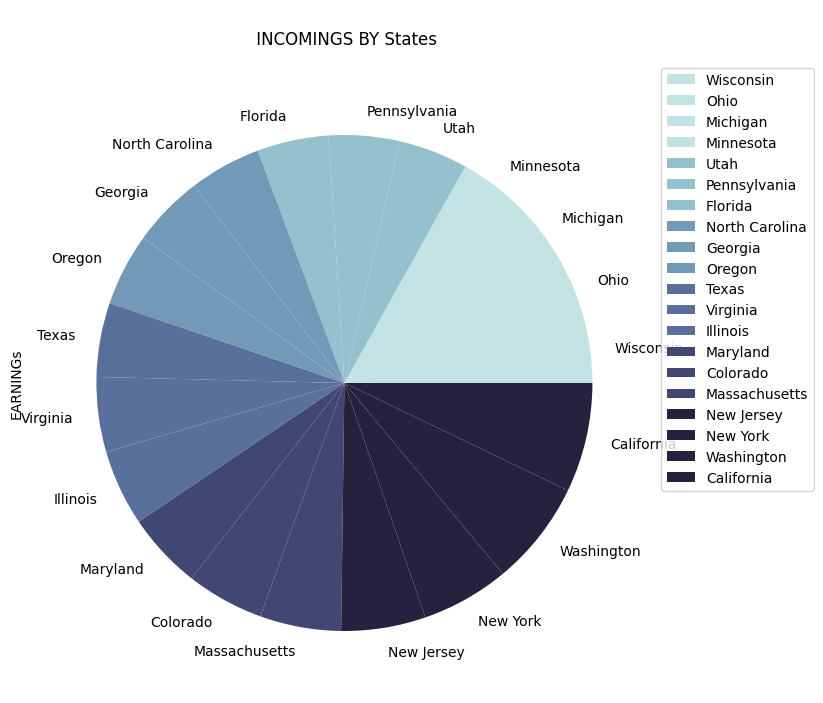

In [160]:
# What State has the bigger incoming?

df_top_states.groupby(['US_State']).mean()['CompTotal'].sort_values().plot(kind='pie',stacked=True,colormap=ListedColormap(sns.color_palette("ch:start=.2,rot=-.3")),figsize=(8,10
))


plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMINGS BY States\n')
plt.show()




### 1.1.2 Showing  results in a bar plot

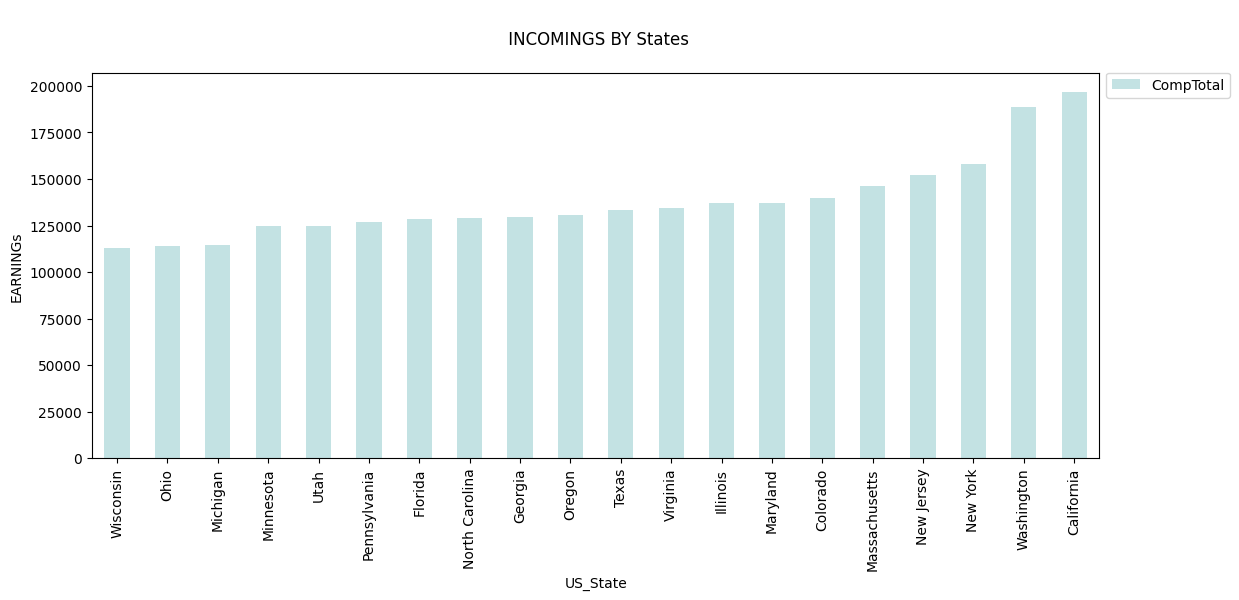

In [161]:
# Which State has the bigger incoming?

df_top_states.groupby(['US_State']).mean()['CompTotal'].head(20).sort_values().plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:start=.2,rot=-.3")),figsize=(13,5))


plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMINGS BY States\n')
plt.show()


### 2. What is the earning  by Education Level?


##### 2.1 Calculating earning by Education Level


In [123]:
#Agrouping CompTotal by EdLevel
df_dev_full_time_us.groupby(['EdLevel']).mean()['CompTotal'].sort_values().dropna()

EdLevel
Associate degree (A.A., A.S., etc.)                                                   117499.015464
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    119351.729885
Something else                                                                        122986.161290
Primary/elementary school                                                             136646.000000
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          138521.165736
Some college/university study without earning a degree                                138899.597222
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       151157.543043
Professional degree (JD, MD, etc.)                                                    155564.128205
Other doctoral degree (Ph.D., Ed.D., etc.)                                            244711.617834
Name: CompTotal, dtype: float64

### 2.1.1 Showing  results in a pie plot

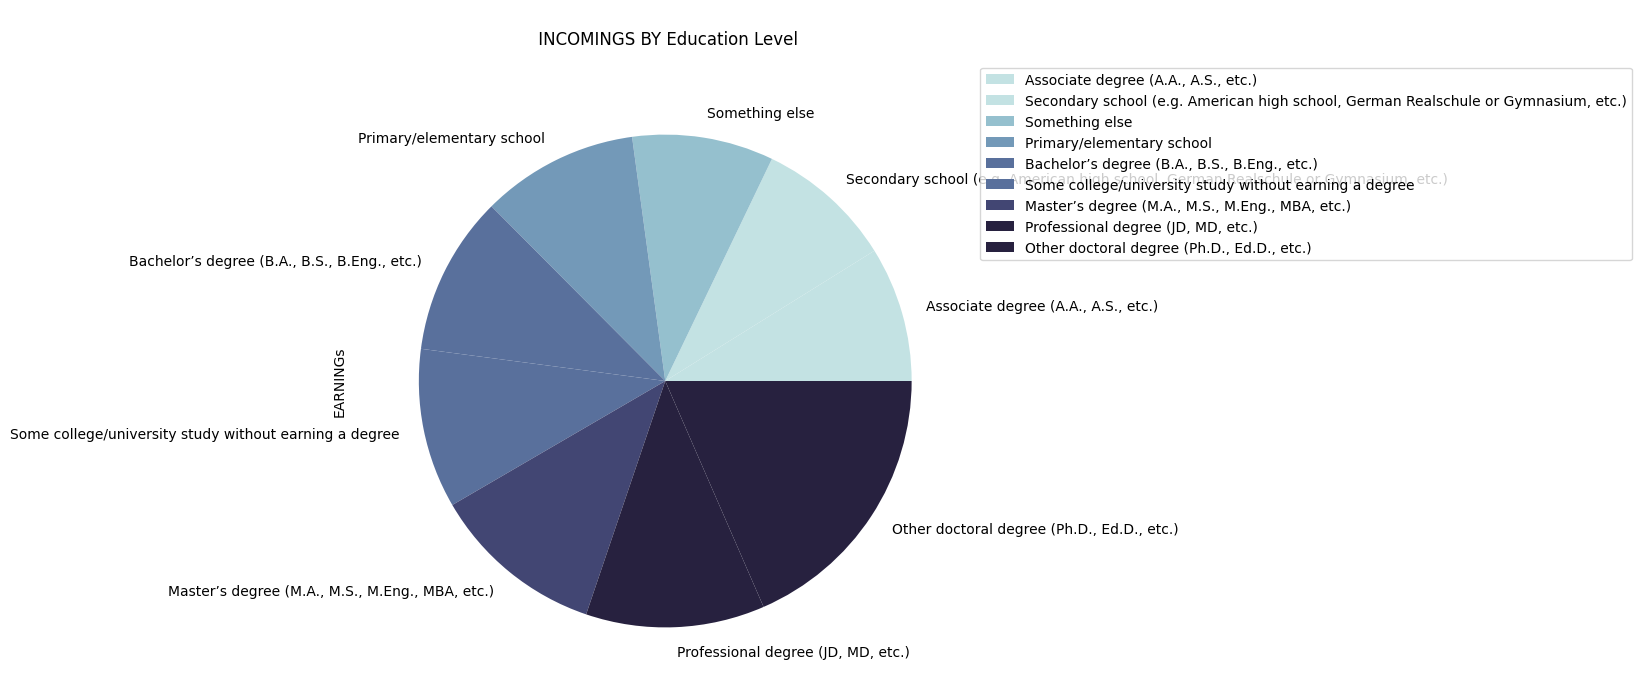

In [138]:

# showing using a plot pie
df_dev_full_time_drops_miss_rows.groupby(['EdLevel']).mean()['CompTotal'].sort_values().dropna().plot(kind='pie',stacked=True,colormap=ListedColormap(sns.color_palette("ch:start=.2,rot=-.3")),figsize=(12,8))

plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMINGS BY Education Level\n')
plt.show()



### 2.1.2 Showing results in a bar plot

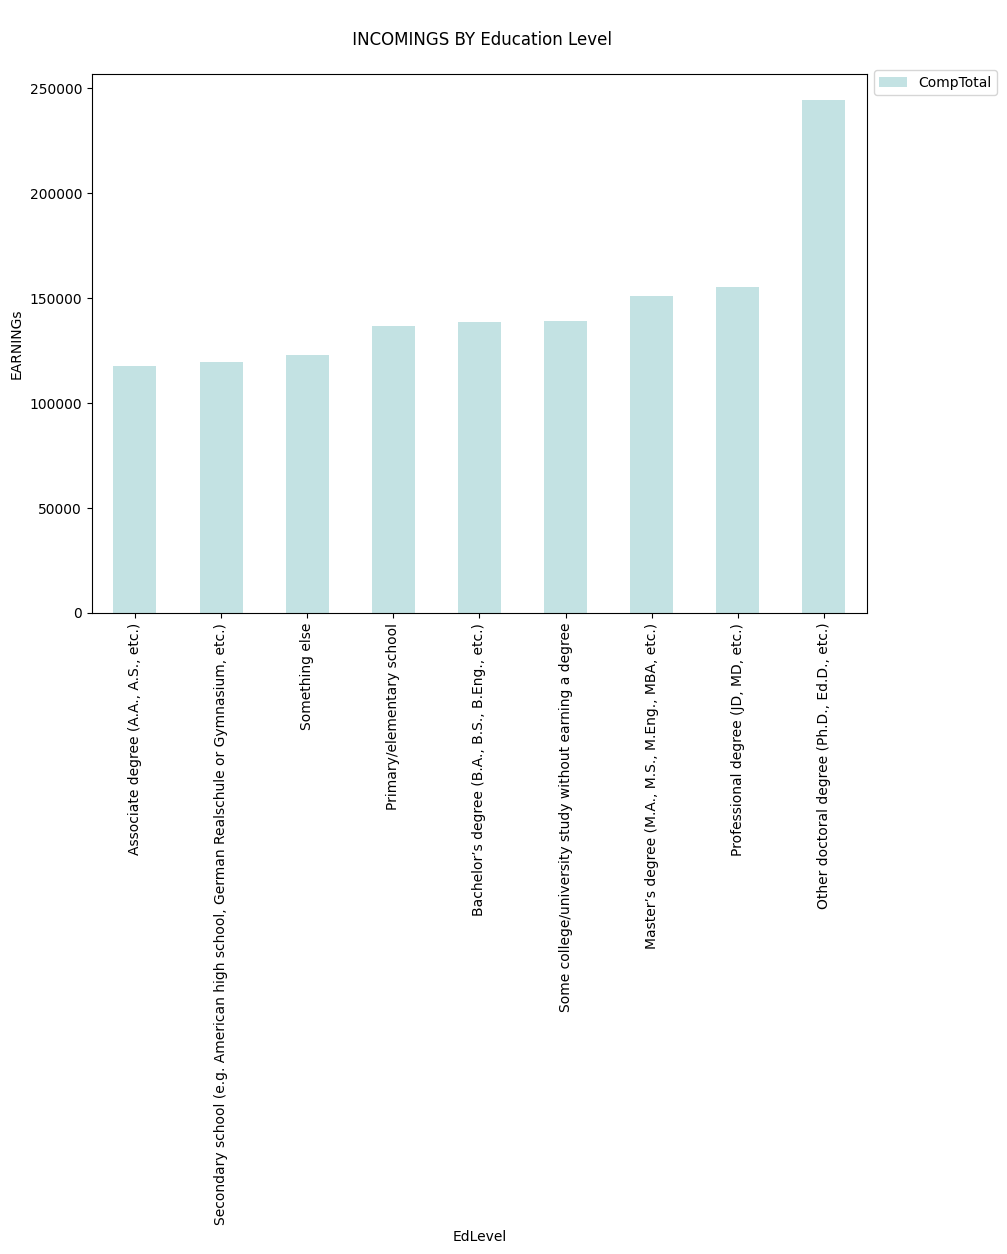

In [143]:

#Agrouping CompTotal by EdLevel
df_dev_full_time_drops_miss_rows.groupby(['EdLevel']).mean()['CompTotal'].sort_values().dropna().plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:start=.2,rot=-.3")),figsize=(10,7))

plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMINGS BY Education Level\n')
plt.show()



### 3 What is the OpSys most used in the top countries?


##### 3.1 Calculating earning by OS used

In [141]:
#Agrouping CompTotal by OpSys
df_dev_full_time_drops_miss_rows.groupby(['OpSys']).mean()['CompTotal'].dropna().sort_values()

OpSys
Windows Subsystem for Linux (WSL)    123274.142180
Windows                              129013.375870
BSD                                  131181.818182
Linux-based                          149319.966304
MacOS                                153596.631104
Other (please specify):              157229.292683
Name: CompTotal, dtype: float64

### 3.1.1 Showing the results in a plot pie

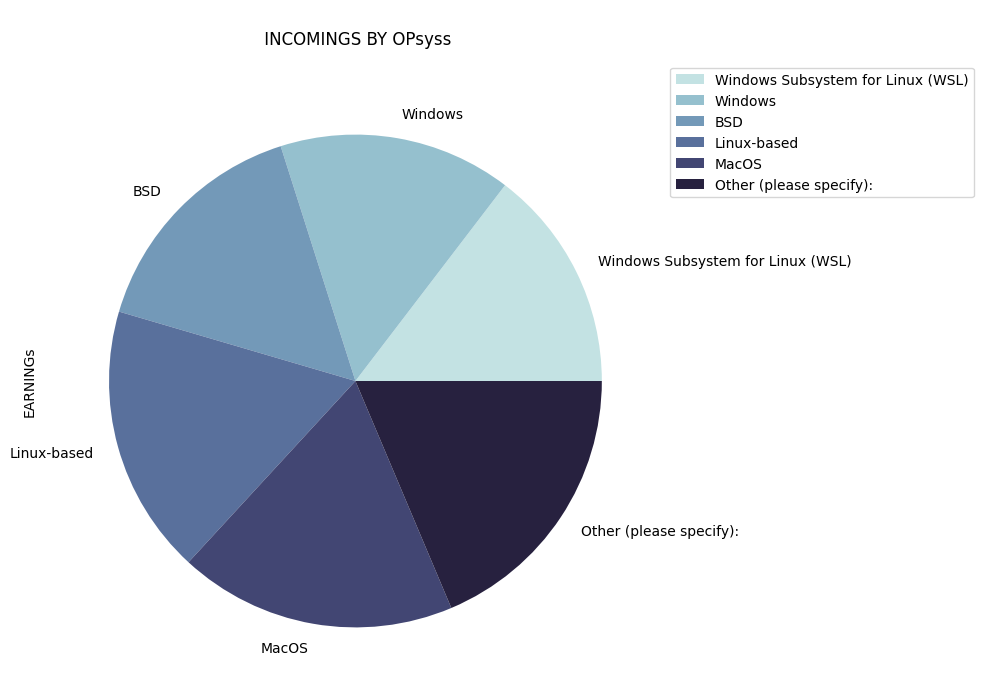

In [140]:
# Using a plot pie to show results

df_dev_full_time_drops_miss_rows.groupby(['OpSys']).mean()['CompTotal'].dropna().sort_values().plot(kind='pie',stacked=True,colormap=ListedColormap(sns.color_palette("ch:start=.2,rot=-.3")),figsize=(12,8))

plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMINGS BY OPsys\n')
plt.show()




### 3.2.SO used by top countries

In [ ]:
# Select the countries with more respondends
top_countries = list(df_dev_full_time['Country'].value_counts().head(10).index)
#Filter countries
f_countries = df_dev_full_time[df_dev_full_time['Country'].isin(top_countries)]
#Aggregate by Country and OpSys
aggregated_data = f_countries.groupby(['Country','OpSys'], as_index=False)['ResponseId'].count()


total_respondents_per_country = f_countries['Country'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data.apply(lambda x: x['ResponseId'] / total_respondents_per_country[x['Country']], axis=1).round(3)


aggregated_data = aggregated_data[['Country', 'OpSys', 'Respondent Percentage']]

pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='OpSys')


pivoted_data.plot(kind='bar',stacked=True,colormap=ListedColormap( sns.color_palette("ch:start=.2,rot=-.3")),figsize=(13,5))




plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))

plt.ylabel('Percentafw')
plt.title('\n SO used by top COUNTRY\n')
plt.show()


### 3.1.2 Showing  results in a bar pot

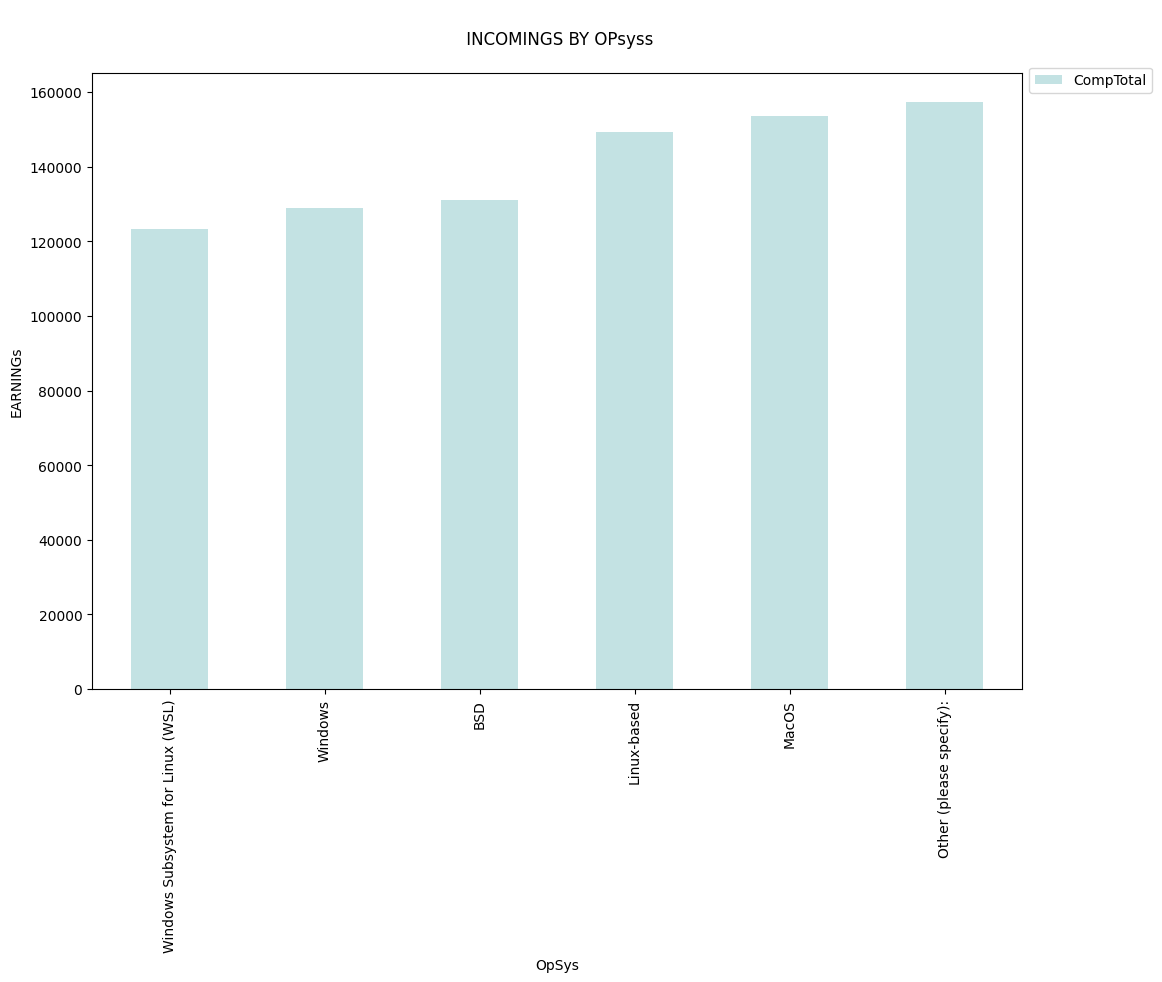

In [142]:
# Which is the OS best paid?

df_dev_full_time_drops_miss_rows.groupby(['OpSys']).mean()['CompTotal'].dropna().sort_values().plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:start=.2,rot=-.3")),figsize=(12,8))

plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMINGS BY OPsys\n')
plt.show()



### 4. Top countries with more Professional degree between Respondends working as a developers full time

<AxesSubplot: xlabel='Country'>

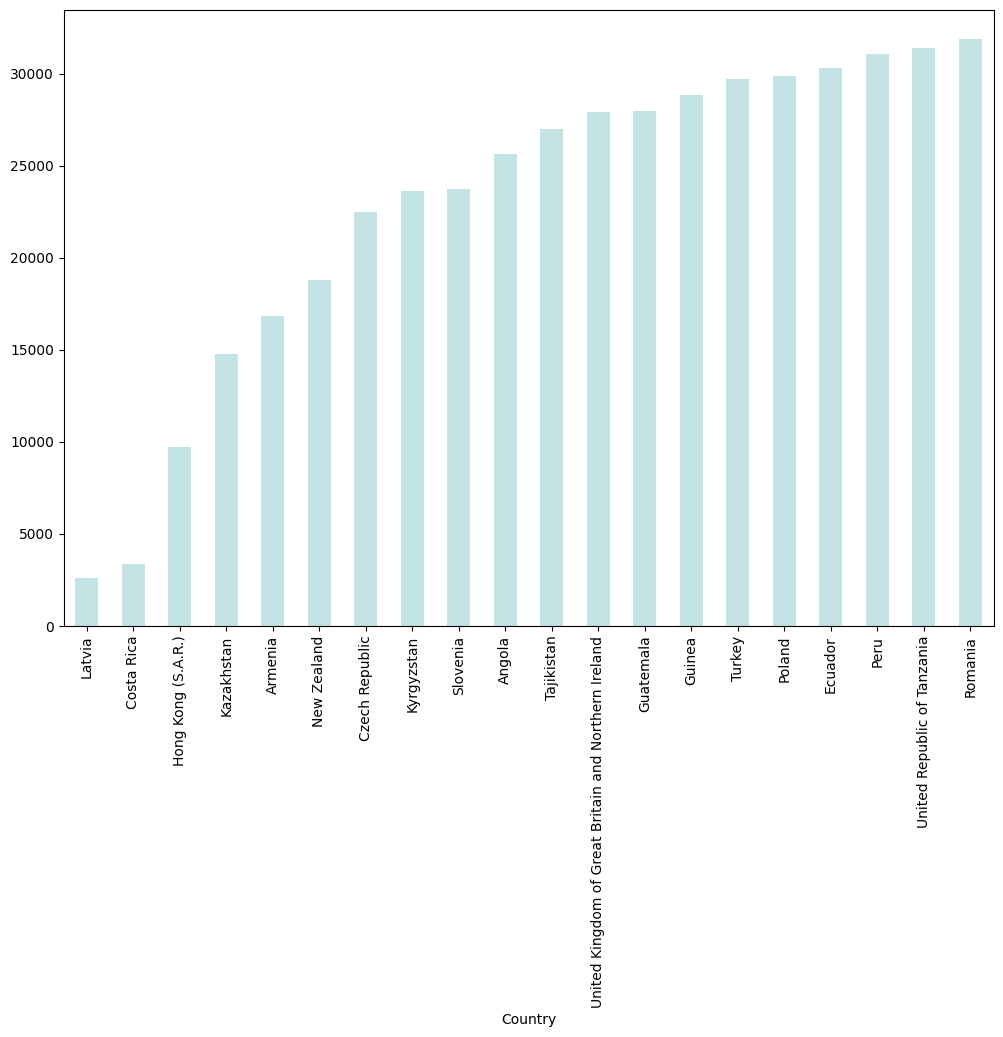

In [195]:
df_dev_full_time[df_dev_full_time.EdLevel=='Professional degree (JD, MD, etc.)']

df_selected_cols
df_dev_full_time.groupby(['Country']).mean()['ResponseId'].dropna().sort_values().head(20).plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:start=.2,rot=-.3")),figsize=(12,8))

### 4. Top countries with more Professional degree between Respondends working as a developers full time

754

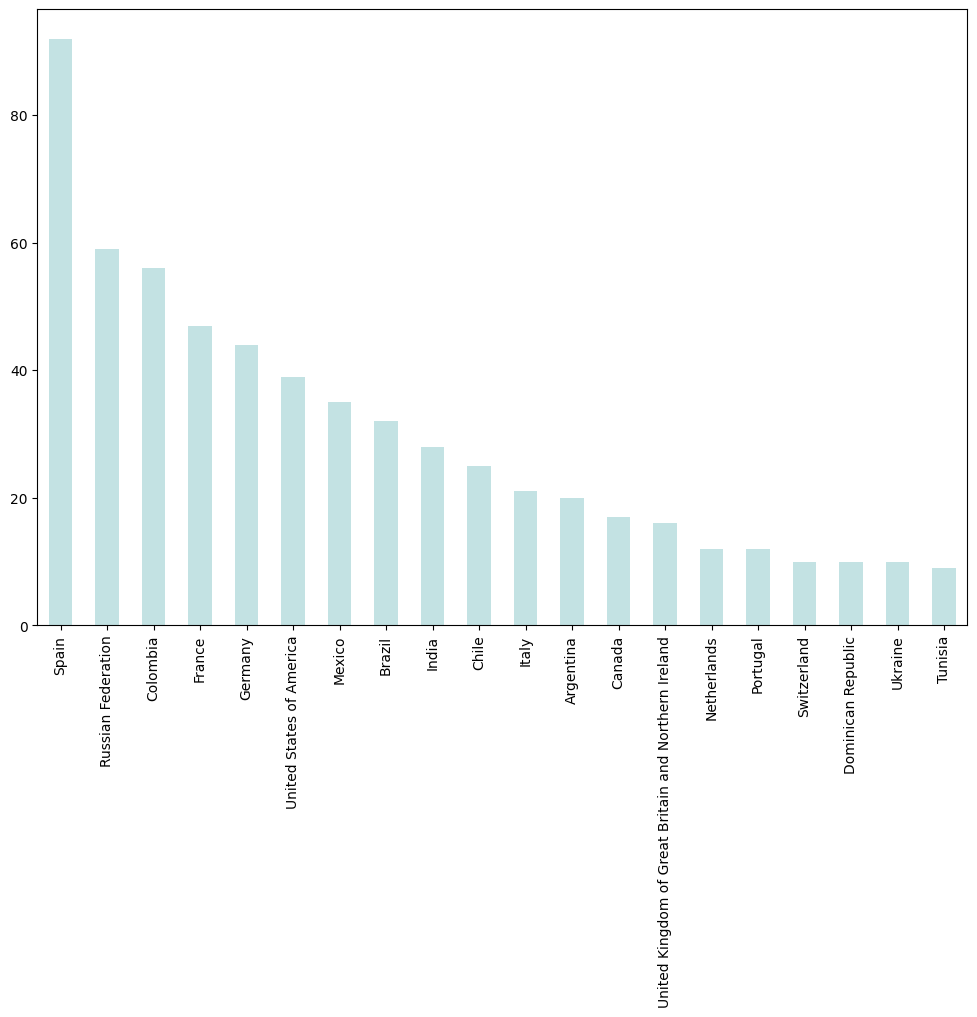

In [192]:
df_dev_full_time=df_dev_full_time[df_dev_full_time.EdLevel=='Professional degree (JD, MD, etc.)']


df_dev_full_time['Country'].value_counts().head(20).plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:start=.2,rot=-.3")),figsize=(12,8))

np.sum(df_dev_full_time['Country'].value_counts())
